<a href="https://colab.research.google.com/github/lidiyakelay/Hopfield_training/blob/main/Hopfield_Training_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Import Dependencies

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

##Load and preprocess data

In [110]:
def load_data():
    (train_images, _), (_, _) = mnist.load_data()
    train_images = (train_images > 127).astype(np.int8) * 2 - 1
    return train_images

##Train Hopfield network

In [111]:
def train_hopfield(images):
    n_pixels = images.shape[1] * images.shape[2]
    W = np.zeros((n_pixels, n_pixels))
    for img in images:
        flat_img = img.flatten()
        W += np.outer(flat_img, flat_img)
    np.fill_diagonal(W, 0)
    return W / images.shape[0]

##Distort pattern



In [112]:
def distort_pattern(pattern, noise_level=0.3):
    distorted = pattern.copy().flatten()
    n_flip = int(noise_level * len(distorted))
    flip_indices = np.random.choice(len(distorted), n_flip, replace=False)
    distorted[flip_indices] = -distorted[flip_indices]
    return distorted.reshape(pattern.shape)

##Recall function

In [113]:
def recall(W, pattern, max_iter=10):
    flat_pattern = pattern.flatten()
    for _ in range(max_iter):
        for i in range(len(flat_pattern)):
            flat_pattern[i] = np.sign(np.dot(W[i], flat_pattern))
    return flat_pattern.reshape(pattern.shape)

##Visualization

In [114]:
def plot_images(original, distorted, recalled):
    fig, ax = plt.subplots(1, 3)
    ax[0].imshow(original, cmap='gray')
    ax[0].set_title("Original")
    ax[1].imshow(distorted, cmap='gray')
    ax[1].set_title("Distorted")
    ax[2].imshow(recalled, cmap='gray')
    ax[2].set_title("Recalled")
    plt.show()

## Execution

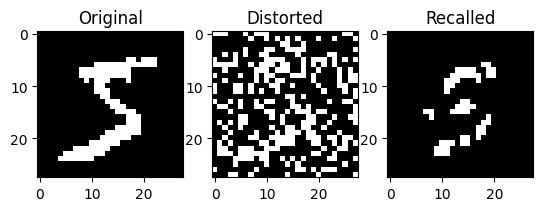

In [115]:
images = load_data()[:5]
W = train_hopfield(images)
test_image = images[0]
distorted_image = distort_pattern(test_image, noise_level=0.3)
recalled_image = recall(W, distorted_image)

plot_images(test_image, distorted_image, recalled_image)